In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt


SyntaxError: invalid syntax (3524441052.py, line 7)

In [2]:
genes = ['gene' + str(i) for i in range(1,101)]
 
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]
 
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
 
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
 
print(data.head())
print(data.shape)

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  108  147  147  125  131  757  697  695  720  741
gene2  956  932  952  978  919  317  312  317  328  341
gene3  229  246  233  243  228  433  447  451  474  453
gene4  731  679  653  657  660  230  265  247  255  243
gene5  563  575  544  524  602  674  692  688  677  675
(100, 10)


In [3]:
scaled_data = preprocessing.scale(data.T) # data.Transpose of the data
# after centering the data, avg value of each gene = 0
# after scaling, the std is 1

pca = PCA()
pca.fit(scaled_data) # pca math (loading scores and variation of each pc)
pca_data = pca.transform(scaled_data)

In [20]:
# # percentage of variation per principal component

# labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

# plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label = labels)
# plt.ylabel('Percent of explained var')
# plt.xlabel('principal component')
# plt.title('screen plot')
# plt.show()

# # almost all the variation is from PC 1

pca = PCA(n_components = 2)
#per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
pca.fit(scaled_data)



PCA(n_components=2)

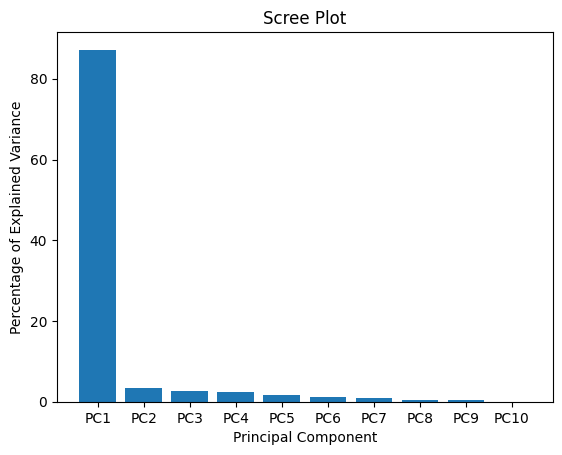

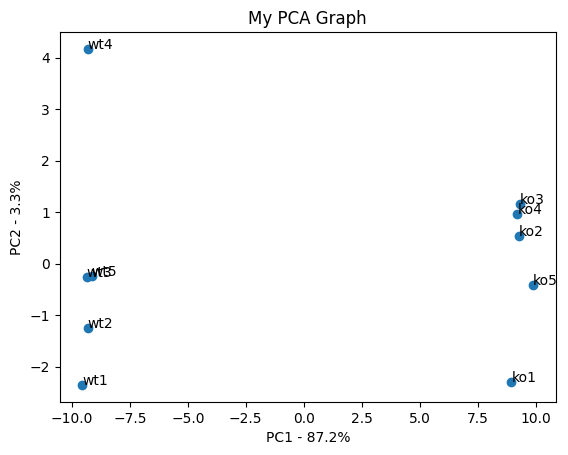

In [4]:
# making PCA plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()
 
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

# # wt clustered together suggests they are correlated
# # the separation between the samples suggests the wt samples are diff than ko

# x_pca = pca.transform(scaled_data)
# scaled_data.shape

# plt.figure(figsize=(8,6))
# plt.scatter(x_pca[:,0], x_pca[:,1])

In [19]:
## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=genes)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

gene84    0.106329
gene15    0.106311
gene83    0.106301
gene76   -0.106294
gene77   -0.106283
gene67    0.106282
gene23    0.106275
gene68   -0.106261
gene51   -0.106249
gene37    0.106247
dtype: float64
